#  Assignment 3
## Sandeep Pal
## Student ID: 202091837
## Date coded: 20-2-2023. Comments added 23-2-2023

### Import Matplotlib,Pandas and Numpy, loading olympic athletes CSV data into dataframe. Note: CSV file is in the same path as the ipynb file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('olympic_athletes.csv')

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Q1) The below code plots a violin plot which shows the height distributions of athletes in the Gymnastics, Cycling and Basketball sports at the Olympic games between 2000 to 2016 (inclusive). The line inside each violin shows the location of the median value.
Steps in the form of code comments \
References:
https://www.geeksforgeeks.org/make-a-violin-plot-in-python-using-matplotlib \
https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples \
https://stackoverflow.com/questions/26291479/changing-the-color-of-matplotlibs-violin-plots \
https://stackoverflow.com/questions/63266190/how-to-create-violin-plots-when-categorical-variable-is-numeric-and-unevenly-se 

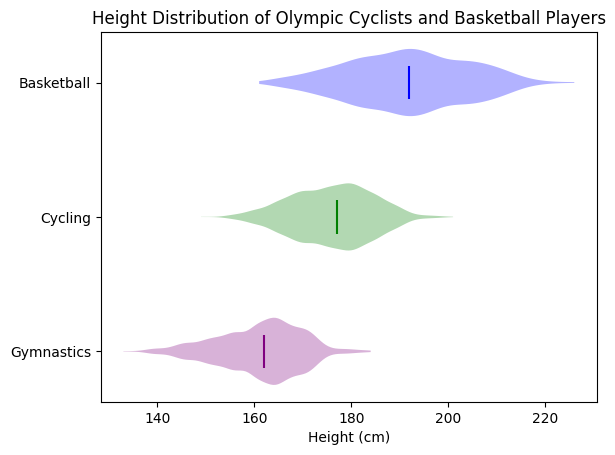

In [4]:
## Retrieve the players between 2000 and 2016
player_data_between_2000_2016 = df[(df['Year'] >= 2000) & (df['Year'] <= 2016)]
##R etrieve individual Basketball, cycling and gymnastic players
basketball_players = player_data_between_2000_2016[player_data_between_2000_2016['Sport'].str.contains('Basketball')]
cycling_players = player_data_between_2000_2016[player_data_between_2000_2016['Sport'].str.contains('Cycling')]
gymnastic_players = player_data_between_2000_2016[player_data_between_2000_2016['Sport'] == 'Gymnastics']
## Retrieve the player heights for the Basketball,Cycling and Gymnastic player heights. Remove NaN parameters
basketball_player_height = basketball_players['Height'].dropna()
cycling_player_height = cycling_players['Height'].dropna()
gymnastic_player_height = gymnastic_players['Height'].dropna()
## List of the Player Heights
data_to_plot = [gymnastic_player_height, cycling_player_height, basketball_player_height]
## List of colours
colors = ['Purple', 'Green', 'Blue']
fig, ax = plt.subplots()

## Plot the Violin plots setting the relevant colours from the colours list
#ax.violinplot([cyclist_height_data['Height'], basketball_height_data['Height']])
violin_parts = ax.violinplot(data_to_plot,showmedians=True,vert=False,showextrema=False)
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)

# Set the color of the median lines
violin_parts['cmedians'].set_colors(colors)

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Gymnastics','Cycling','Basketball' ])
ax.set_title('Height Distribution of Olympic Cyclists and Basketball Players')

# Add x-axis label
ax.set_xlabel('Height (cm)')

# Show plot
plt.show()



In [5]:
##Data for reference
#player_data_between_2000_2016

In [6]:
#Data for reference
#gymnastic_player_height

### Q2) The below code plots a line plot shows the average height of male (blue) and female (red) Olympians over the history of the Summer Olympics. The shaded region represents the standard deviation about the average.
Steps in the form of code comments \
References:
https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html \
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html \
https://matplotlib.org/3.3.4/gallery/recipes/fill_between_alpha.html \
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html \
https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-across-multiple-columns-in-python-pandas

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_37772\3261884990.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_data = df_summer.drop_duplicates(subset=['Name', 'Sex', 'Year'], keep='first').groupby(['Sex','Year']).mean().reset_index().dropna()
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_37772\3261884990.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std = df_summer.drop_duplicates(subset=['Name', 'Sex', 'Year'], keep='first').groupby(['Sex','Year']).std().reset_index().dropna()


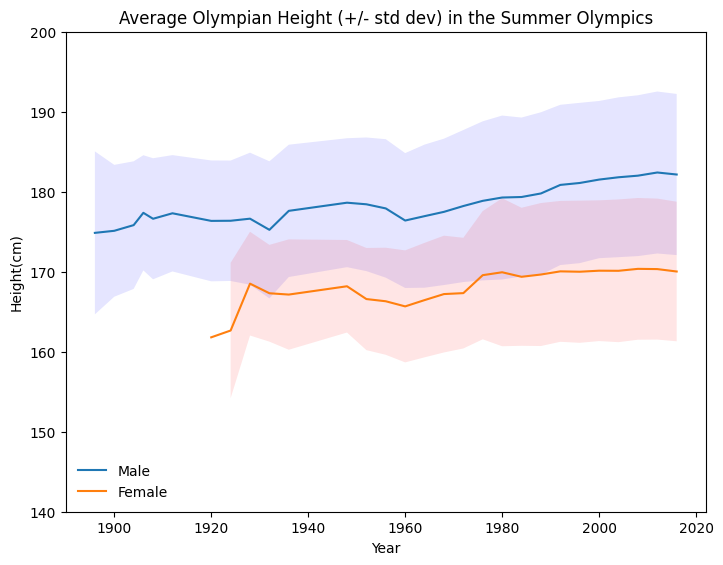

In [7]:
#pd.options.display.max_rows = None
## Dataframe containing details of olympians who have take part in Summer Olympics
df_summer = df[df['Season'] == 'Summer']
## Compute the Average details like Age,Height,Weight grouping by Sex and Year and dropping the Duplicates from Name,Sex,Year i.e each athlete is represented once per year3
avg_data = df_summer.drop_duplicates(subset=['Name', 'Sex', 'Year'], keep='first').groupby(['Sex','Year']).mean().reset_index().dropna()
avg_data
#Average data for Male and Female in corrosponding variables
male_avg_data = avg_data[avg_data['Sex'].str.contains('M')]
male_avg_data
female_avg_data = avg_data[avg_data['Sex'].str.contains('F')]
female_avg_data
#Standard deviation for details like Age,Height,Weight grouping by Sex and Year and dropping the Duplicates from Name,Sex,Year i.e each athlete is represented once per year3
std = df_summer.drop_duplicates(subset=['Name', 'Sex', 'Year'], keep='first').groupby(['Sex','Year']).std().reset_index().dropna()
#Height standard deviation corrosponding to the Male and the Female genders
male_std = std[std['Sex'].str.contains('M')]
male_std = male_std['Height']
#female_std = df_summer.drop_duplicates(subset=['Name', 'Sex', 'Year'], keep='first').groupby(['Sex','Year']).std().reset_index().dropna()
female_std = std[std['Sex'].str.contains('F')]
female_std = female_std['Height']
female_std
#Plot the line graphs for average height and whe filled shaded regions with + & - of standard deviation. Transparency with alpha and colour with facecolor attributes
fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(male_avg_data['Year'], male_avg_data['Height'], label="Male")
ax.plot(female_avg_data['Year'], female_avg_data['Height'], label="Female")
ax.fill_between(male_avg_data['Year'], male_avg_data['Height']+male_std, male_avg_data['Height']-male_std, facecolor='blue', alpha=0.1)
ax.fill_between(female_avg_data['Year'], female_avg_data['Height']+female_std, female_avg_data['Height']-female_std, facecolor='red', alpha=0.1)
ax.set_ylim(140, 200)

ax.set_xlabel('Year')
ax.set_ylabel('Height(cm)')
ax.set_title('Average Olympian Height (+/- std dev) in the Summer Olympics')
ax.legend(loc='lower left', framealpha=0)
fig





In [8]:
##Data for reference
#male_avg_data
#female_avg_data
#std
#male_std

In [9]:
##Data for reference
#avg_data

### Q3) The below code plots the bar plot below shows the top 10 most decorated Olympians. That is, the Olympic athletes that have won the highest total number of medals. Each bar is colour coded according to the number of gold, silver and bronze medals won by that athlete. In this way, the total number of medals won is represented, along with the breakdown per medal type.
References: 
https://datatofish.com/convert-pandas-dataframe-to-list/ \
https://www.tutorialspoint.com/horizontal-stacked-bar-chart-in-matplotlib \
https://stackoverflow.com/questions/65766935/how-to-display-stacked-bar-chart-horizontally \

Logic Used: \
Step1: Sort Athletes with medal count with max medals on top. \
Step2: 15 atheltes have medals >= 12 so extracting them for ease of data and retrieving their name. \
Step3: Getting the details of the 15 athletes from the original dataframe with the help of names retrieved from step 2. \
Step4: Retrieving the Gold/Silver/Bronze medalists and sorting by their names and not medal count (For consistency during weight summation) \
Step5: Assigning the Gold/Silver/Bronze medalists with 100/10/1 Weights(Points) and 1000 Weight for medal winners for each medal \
Step6: Retrieving the top 10 performers for each medal type \
Step7: Summing the weights \
Step8: Plotting stacked bar plot


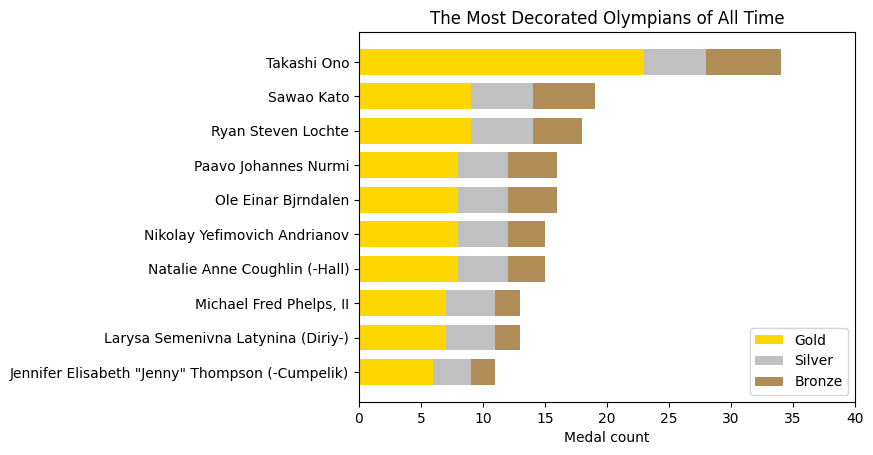

In [10]:
#Step 1
df_medals = df[(df['Medal'] == 'Gold') | (df['Medal'] == 'Silver') | (df['Medal'] == 'Bronze')].groupby('Name').count().sort_values(by='Medal', ascending=False)
#Step 2
df_medals_top_ranking_by_count = df_medals[df_medals['Medal'] >=12 ].reset_index()
df_medals_top_ranking_by_count
df_medals_top_players = df_medals_top_ranking_by_count['Name']
df_medals_top_players
#Step 3
df2 = df[df['Name'].isin(df_medals_top_players)]
#Step 4 & 5 & 6
top_athelete_gold = df2[ (df2['Medal'] == 'Gold')].groupby('Name').count().sort_values(by='Name',ascending=False)
#Assigning 100 weight for gold
top_athelete_gold['Weight'] = top_athelete_gold['Medal']*100
top_athelete_gold
gold_medals_count = top_athelete_gold['Medal'].sort_values(ascending=False).reset_index()

gold_medals_count = gold_medals_count[:10].reset_index()
# Converting to list for plotting
gold_medals_count = gold_medals_count['Medal'].values.tolist()

#Step 4 & 5 & 6
top_athelete_silver = df2[ (df2['Medal'] == 'Silver')].groupby('Name').count().sort_values(by='Name',ascending=False)
#Assigning 10 weight for Silver
top_athelete_silver['Weight'] = top_athelete_silver['Medal']*10
top_athelete_silver
silver_medals_count = top_athelete_silver['Medal'].sort_values(ascending=False).reset_index()
silver_medals_count = silver_medals_count[:10].reset_index()
# Converting to list for plotting
silver_medals_count = silver_medals_count['Medal'].values.tolist()
silver_medals_count
#Step 4 & 5 & 6
top_athelete_bronze = df2[ (df2['Medal'] != 'Gold') & (df2['Medal'] != 'Silver')].groupby('Name').count().sort_values(by='Name',ascending=False).reset_index()
#Assigning 1 weight for Bronze
top_athelete_bronze['Weight'] = top_athelete_bronze['Medal']*1
top_athelete_bronze
bronze_medals_count = top_athelete_bronze['Medal'].sort_values(ascending=False).reset_index()
bronze_medals_count = bronze_medals_count[:10].reset_index()

# Converting to list for plotting
bronze_medals_count = bronze_medals_count['Medal'].values.tolist()

#Step 4 & 5 & 6
top_athlete_more_medals = df2[ (df2['Medal'] == 'Gold') | (df2['Medal'] == 'Silver') | (df2['Medal'] == 'Bronze')].groupby('Name').count().sort_values(by='Name',ascending=False)
#Assigning 1000 weight for top medal winners
top_athlete_more_medals['Weight'] = top_athlete_more_medals['Medal']*1000
top_athlete_more_medals
top_athlete_total = df2[ (df2['Medal'] == 'Gold') | (df2['Medal'] == 'Silver') | (df2['Medal'] == 'Bronze')].groupby('Name').count().sort_values(by='Name',ascending=False)
#Step 7 
top_athlete_total['Weight'] = top_athelete_gold['Weight']+top_athelete_silver['Weight']+top_athelete_bronze['Weight']+top_athlete_more_medals['Weight']
top_athlete_total = top_athlete_total.sort_values(by='Weight',ascending=False).reset_index()
top_athlete_total_top = top_athlete_total[:10].reset_index()
top_athlete_total_top_list = top_athlete_total_top['Name'].values.tolist()

bronze_medals_count
#top_athlete_total_top_list
top_athlete_total_top_list
#Step 8
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(top_athlete_total_top_list, gold_medals_count, align='center', height=.75, color='#FFD700',label='Gold')
ax.barh(top_athlete_total_top_list, silver_medals_count, align='center', height=.75, left=gold_medals_count, color='#C0C0C0',label='Silver')
ax.barh(top_athlete_total_top_list, bronze_medals_count, align='center', height=.75, left=np.add(silver_medals_count,gold_medals_count), color='#B08D57',label='Bronze')

ax.set_yticks(top_athlete_total_top.Name)
ax.set_xlim(0,40)
ax.set_xlabel('Medal count')
ax.set_title('The Most Decorated Olympians of All Time')
ax.grid(False)
ax.legend(loc='lower right')
ax.invert_yaxis()
plt.show() 



In [12]:
##Data for reference
#df_medals
#df_medals[df_medals['Medal'] >=11 ]
#df2
#gold_medals_count
#silver_medals_count
#bronze_medals_count
#top_athelete_bronze
#top_athelete_silver
#top_athelete_gold
#top_athlete_total_top
#top_athlete_total